##**IAF 604 - Assignment 2**
##**Jeanne Reppert**
##**May 1, 2020**

## 1. Importing Packages and CSV file

In [ ]:
#import packages
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#make connection to google colab drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#loading framingham.csv dataset
df = pd.read_csv('/content/drive/My Drive/Colab IAF 604/framingham.csv')

## 2. Data Exploration

In [ ]:
#displaying first five observations of dataset
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
#checking last five observations of dataset
df.tail()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [ ]:
#dataset has two dimensions
df.ndim

2

In [ ]:
#checking dataset shape - 4240 observations, 16 columns
df.shape

(4240, 16)

In [ ]:
#checking number of elements - 67840 total
df.size

67840

In [ ]:
#checking datatypes - all numeric
#some in64 and some float64
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [ ]:
#checking for nulls - several categories have nulls
#glucose is the highest with 388 nulls
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
#dropping education variable
df = df.drop(['education'], axis = 1)

In [ ]:
#removing remaining NA values
df = df.dropna()

In [ ]:
#checking dataset null counts after dropna
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
#cleaned dataset shape - 3751 observations, 15 columns
df.shape

(3751, 15)

In [ ]:
#cleaned dataset size - 56265 elements
df.size

56265

## Analysis: 
*The Framingham dataset is a two dimensional set with a total of 4240 observations, 6 total columns which were all numeric (one being a binary target variable) and 67840 total elements. Feature names included were gender, age, education, smoker, number of cigarettes, BP medications, stroke, hypertension, diabetes, cholesterol, systolic blood pressure, diastolic blood pressure, BMI, heart rate, and glucose. The target variable was the risk of developing heart disease within ten years. Once the education column was removed and the NaN values were removed from the dataset, there were 3751 total observations, 15 columns and 56265 total elements. All data types were either int64 or float64.*

## 3. Statistical Analysis and Visualizations

In [ ]:
#Displaying and exploring count, mean, std, min, max and quartile measures
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.445215,49.573447,0.488403,9.008531,0.030392,0.005599,0.311917,0.027193,236.928019,132.368435,82.938550,25.808288,75.704079,81.880032,0.152493
std,0.497056,8.570204,0.499932,11.925097,0.171686,0.074623,0.463338,0.162666,44.611594,22.046522,11.932779,4.065599,11.956382,23.882233,0.359546
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.085000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
##Checking Gender categories and counts
df['male'].value_counts()

0    2081
1    1670
Name: male, dtype: int64

In [ ]:
#Checking prevalentHyp categories and counts
df['prevalentHyp'].value_counts()

0    2581
1    1170
Name: prevalentHyp, dtype: int64

In [ ]:
##Checking prevalentStroke categories and counts
df['prevalentStroke'].value_counts()

0    3730
1      21
Name: prevalentStroke, dtype: int64

In [ ]:
#Checking diabetes categories and counts
df['diabetes'].value_counts()

0    3649
1     102
Name: diabetes, dtype: int64

In [ ]:
#Checking currentSmoker categories and counts
df['currentSmoker'].value_counts()

0    1919
1    1832
Name: currentSmoker, dtype: int64

In [ ]:
#Checking BPMeds categories and counts
df['BPMeds'].value_counts()

0.0    3637
1.0     114
Name: BPMeds, dtype: int64

In [ ]:
#Checking TenYearCHD categories and counts
df['TenYearCHD'].value_counts()

0    3179
1     572
Name: TenYearCHD, dtype: int64

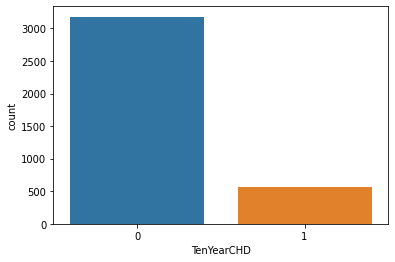

In [ ]:
#Target distribution - target is imbalanced
sns.countplot(x='TenYearCHD',data=df)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


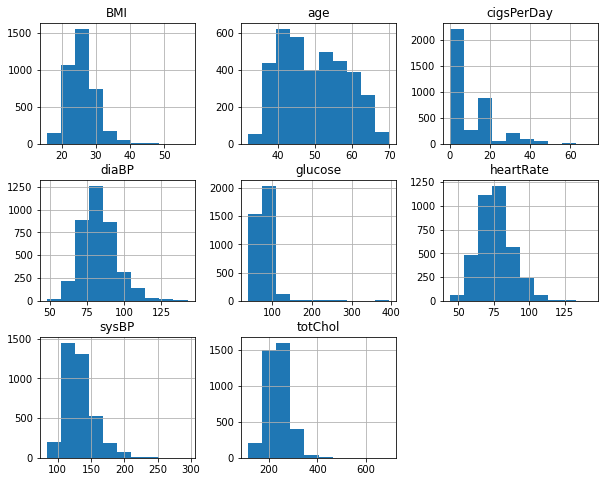

In [ ]:
#Looking at distributions for BMI, age, cigsPerDay, diaBP, glucose and heartRate
df_subset = df.drop(['TenYearCHD', 'BPMeds', 'male', 'currentSmoker', 
                     'diabetes', 'prevalentHyp', 'prevalentStroke'], axis = 1)
fig = plt.figure(figsize = (10,8))
ax = fig.gca()
df_subset.hist(ax = ax)
plt.show()

## Statistical Analysis:
*Since the KNN algorithm is non-parametric, the distribution of the data is not quite as much of a concern. Nonetheless some exploration was done to become familiar with the statistical measures of the data. For the gender (female=0, male=1) variable, there were 2081 females and 1670 males. The mean participant age given the observations was 49.57 and the median age was 49 indicating a relatively normal distribution of age. Overall, participants smoked an average of 9 cigarettes a day, however, a little more than half of the participants (1919) were non-smokers. A relatively small amount of the participants (114) took blood pressure medication. For the prevalent stroke category there were only 21 participants that indicated a stroke. 1170 of the participants reported hypertension and 2581 of the participants did not report hypertension. Only 102 of the participants reported diabetes.

The mean BMI of the participants was 25.81 and the mean heart rate was 75.70. The mean diastolic blood pressure was 82.94 and the mean systolic blood pressure was 132.37. The mean glucose measure was 81.88 and the mean cholesterol was 236.93. 
*

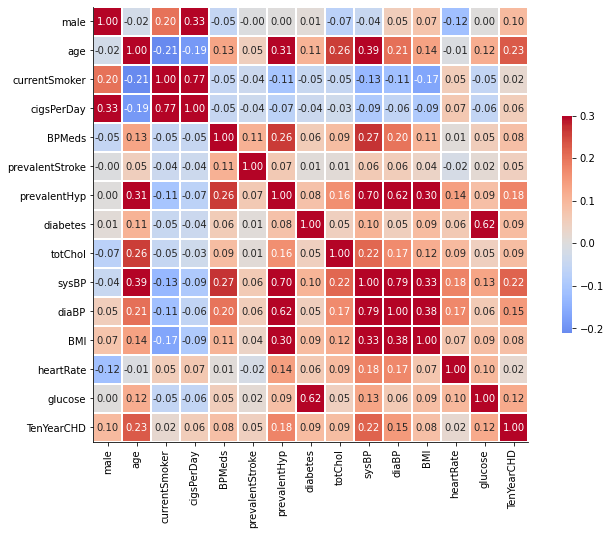

In [ ]:
# Exploring correlations between variables
corr = df.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(12,8)
    
plt.show()

## Analysis of correlation plot and conclusions:
*Understandably, there was indeed a strong correlation between hypertension and blood pressure, as well as a strong correlation between diabetes and glucose. There also was predictably a strong correlation between the number of cigarettes smoked per day and the currentSmoker variable. For this reason, the variables for diabetes, hypertension and current smoker will be eliminated since the other measures give more specific information about the same topic.*

In [ ]:
df = df.drop(['currentSmoker', 'prevalentHyp', 'diabetes'], axis = 1)

## 4. Convert dataframe to Numpy array

In [ ]:
#display columns
df.columns

Index(['male', 'age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
##converting X valriables in the dataframe to a numpy array
X = df[['male', 'age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']] .values  #.astype(float)
X[0:5]


array([[  1.  ,  39.  ,   0.  ,   0.  ,   0.  , 195.  , 106.  ,  70.  ,
         26.97,  80.  ,  77.  ],
       [  0.  ,  46.  ,   0.  ,   0.  ,   0.  , 250.  , 121.  ,  81.  ,
         28.73,  95.  ,  76.  ],
       [  1.  ,  48.  ,  20.  ,   0.  ,   0.  , 245.  , 127.5 ,  80.  ,
         25.34,  75.  ,  70.  ],
       [  0.  ,  61.  ,  30.  ,   0.  ,   0.  , 225.  , 150.  ,  95.  ,
         28.58,  65.  , 103.  ],
       [  0.  ,  46.  ,  23.  ,   0.  ,   0.  , 285.  , 130.  ,  84.  ,
         23.1 ,  85.  ,  85.  ]])

In [ ]:
#convert target variable
y = df['TenYearCHD'].values
y[0:5]


array([0, 0, 0, 1, 0])

##  5. Normalize Data using standard scaler

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 1.11629198, -1.23390951, -0.75552698, -0.17704382, -0.0750335 ,
        -0.93997111, -1.19619549, -1.08443091,  0.28577991,  0.35934732,
        -0.20436458],
       [-0.89582297, -0.4170173 , -0.75552698, -0.17704382, -0.0750335 ,
         0.29305664, -0.51572536, -0.1624775 ,  0.7187382 ,  1.61407468,
        -0.24624229],
       [ 1.11629198, -0.18361952,  0.9218319 , -0.17704382, -0.0750335 ,
         0.18096321, -0.22085497, -0.24629145, -0.11519851, -0.05889514,
        -0.49750858],
       [-0.89582297,  1.33346602,  1.76051134, -0.17704382, -0.0750335 ,
        -0.26741052,  0.79985021,  1.01091774,  0.68183835, -0.89538005,
         0.88445597],
       [-0.89582297, -0.4170173 ,  1.17343573, -0.17704382, -0.0750335 ,
         1.07771066, -0.10744329,  0.08896434, -0.66623633,  0.77758977,
         0.13065713]])

##  6. Splitting dataset to test/train sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
#results in train set of 3000 observations and test set of 751 observations

Train set: (3000, 11) (3000,)
Test set: (751, 11) (751,)


##  7. Implementing KNN Algorithm Using KNeighborsClassifer
##  and Making Predictions

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#select n_neighbors value of 4
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
#use model to predic test set
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0])

## 8. Quantitative/Qualitative Analysis

In [ ]:
# find train and test set accuracy (train - 0.8677 and test - 0.84)
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8676666666666667
Test set Accuracy:  0.8402130492676432


### Finding best K for classification accuracy

In [ ]:
#measure and find best K for k=1:10 using accuracy score
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.7816245 , 0.83888149, 0.82956059, 0.84021305, 0.84021305,
       0.83888149, 0.83888149, 0.84154461, 0.84420772])

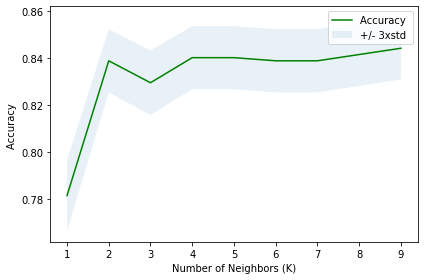

In [ ]:
#plot accuracy results for k=1:10
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
#finding and printing k value with best accuracy score
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.844207723035952 with k= 9


### Other Measures

In [ ]:
#import confusion matrix from sklearn.metrics
from sklearn.metrics import confusion_matrix

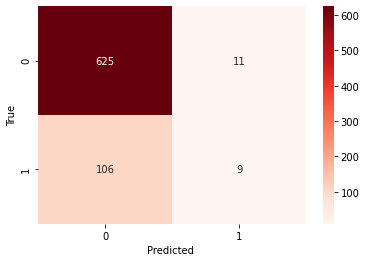

In [ ]:
#create and plot confusion matrix using test set target and predicted target
cm = confusion_matrix(y_test, yhat)

ax= plt.subplot()
sns.heatmap(pd.DataFrame(cm), annot=True,cmap="Reds" , fmt='g')

ax.set_xlabel('Predicted ');ax.set_ylabel('True'); 

In [ ]:
#import packages for roc curve and auc score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

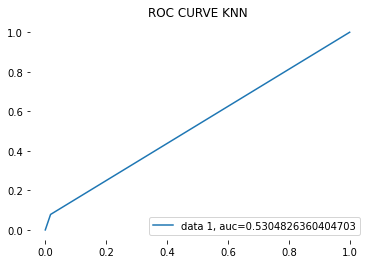

The score for the AUC ROC Curve is: 53.0%


In [ ]:
#Calculate and plot roc curve and auc score
fpr, tpr, _ = roc_curve(y_test, yhat)
auc = roc_auc_score(y_test, yhat)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.box(False)
plt.title ('ROC CURVE KNN')
plt.show()

print(f"The score for the AUC ROC Curve is: {round(auc,3)*100}%")

In [ ]:
#import classification report from sklearn.metrics
from sklearn.metrics import classification_report 

model_classification = classification_report(y_test, yhat)
print(model_classification)

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       636
           1       0.45      0.08      0.13       115

    accuracy                           0.84       751
   macro avg       0.65      0.53      0.52       751
weighted avg       0.79      0.84      0.79       751



In [ ]:
###Compute additional quantitative measures
##Accuracy was 0.84, Sensitivty was 0.98
##Sensitivity was 0.078 and Youden's Index was 0.061
total=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

#Youden's Index
youden = specificity + sensitivity - 1
print('Youden Index : ', youden)

Accuracy :  0.844207723035952
Sensitivity :  0.9827044025157232
Specificity :  0.0782608695652174
Youden Index :  0.0609652720809406


## Analysis:
*The precision score for the model was 0.84 with a sensitivity score of .98 and a specificity score of .08. While the accuracy measures were reasonable and the test and train set accuracies were relatively close, the confusion matrix and sensitivity/specificity scores along with the Youden Index tell another story. Most of the accurate predictions that were made involved predicting those who were not at a 10 year risk for heart disease but only 9 correct predictions were made for those who actually might be at a 10 year risk for heart disease. There were also 106 false positives predicted (predicted as not at risk when the participant was at risk). Overall, given these measures the resulting Youden’s Index was fairly low (0.061). *

## 9. Creating a Balanced Target Variable with Sampling

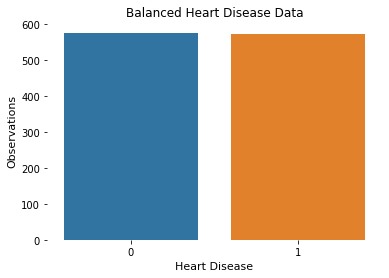

In [ ]:
# Create a sameple set based on balanced TenYear CHD values (576 in each category)
sample_df = df.sample(frac=1,random_state=4)

TenY_df = sample_df.loc[sample_df['TenYearCHD'] == 1]

non_TenY_df = sample_df.loc[sample_df['TenYearCHD'] == 0].sample(n=576,random_state=42)

# Concatenate both dataframes and assign new
# dataset name of df_norm
df_norm = pd.concat([TenY_df, non_TenY_df])

# check new class counts for TenYearCHD
df_norm.TenYearCHD.value_counts()

# plot new count for TenYearCHD
sns.countplot(df_norm.TenYearCHD)
plt.box()
plt.xlabel('Heart Disease',fontsize=11)
plt.ylabel('Observations',fontsize=11)
plt.title('Balanced Heart Disease Data')
plt.show()

##  10. Converting X_norm and y_norm to a Numpy Array

In [ ]:
X_norm = df_norm[['male', 'age', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']] .values  #.astype(float)
X_norm[0:5]

array([[  0.  ,  63.  ,  40.  ,   0.  ,   0.  , 179.  , 116.  ,  69.  ,
         22.15,  95.  ,  75.  ],
       [  1.  ,  62.  ,   0.  ,   0.  ,   0.  , 240.  , 152.  ,  95.  ,
         25.37,  63.  ,  70.  ],
       [  0.  ,  59.  ,   0.  ,   0.  ,   0.  , 240.  , 155.5 , 100.5 ,
         33.54,  72.  , 116.  ],
       [  1.  ,  58.  ,   0.  ,   0.  ,   0.  , 220.  , 143.  , 104.  ,
         29.85,  75.  ,  87.  ],
       [  1.  ,  49.  ,   9.  ,   0.  ,   0.  , 278.  , 152.  ,  93.  ,
         29.76,  64.  ,  63.  ]])

In [ ]:
y_norm = df_norm['TenYearCHD'].values
y[0:5]

array([0, 0, 0, 1, 0])

## 11. Normalize df_norm Dataset Using Standard Scaler

In [ ]:
X_norm = preprocessing.StandardScaler().fit(X_norm).transform(X_norm.astype(float))
X_norm[0:5]

array([[-1.01580432,  1.33831514,  2.38246438, -0.21115394, -0.11111111,
        -1.33537031, -0.83551794, -1.19724274, -0.91150208,  1.57187375,
        -0.30070202],
       [ 0.98444157,  1.22315242, -0.79157427, -0.21115394, -0.11111111,
         0.01315247,  0.62456728,  0.80765522, -0.14494034, -1.06329049,
        -0.45256104],
       [-1.01580432,  0.87766428, -0.79157427, -0.21115394, -0.11111111,
         0.01315247,  0.76652001,  1.23176825,  1.80003154, -0.32215055,
         0.94454193],
       [ 0.98444157,  0.76250156, -0.79157427, -0.21115394, -0.11111111,
        -0.42898615,  0.25954598,  1.50165836,  0.92158035, -0.0751039 ,
         0.06375962],
       [ 0.98444157, -0.27396287, -0.07741558, -0.21115394, -0.11111111,
         0.85321584,  0.62456728,  0.6534323 ,  0.90015471, -0.98094161,
        -0.66516366]])

 ## 12. Splitting df_norm Dataset to test/train Dets

In [ ]:
from sklearn.model_selection import train_test_split
nX_train, nX_test, ny_train, ny_test = train_test_split( X_norm, y_norm, test_size=0.2, random_state=4)
print ('Train set:', nX_train.shape,  ny_train.shape)
print ('Test set:', nX_test.shape,  ny_test.shape)

Train set: (918, 11) (918,)
Test set: (230, 11) (230,)


## 13. Implementing KNN Algorithm Using KNeighborsClassifer
##  and Making Predictions

In [ ]:
k = 4
#Train Model and Predict  
neigh_norm = KNeighborsClassifier(n_neighbors = k).fit(nX_train,ny_train)
neigh_norm

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
yhat_norm = neigh_norm.predict(nX_test)
yhat_norm[0:5]

array([1, 0, 0, 1, 0])

## 14. Quantitative/Qualitative Analysis

In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(ny_train, neigh_norm.predict(nX_train)))
print("Test set Accuracy: ", metrics.accuracy_score(ny_test, yhat_norm))

Train set Accuracy:  0.7549019607843137
Test set Accuracy:  0.6260869565217392


### Finding best K for classification accuracy

In [ ]:
Ks = 10
mean_acc_norm = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh_norm = KNeighborsClassifier(n_neighbors = n).fit(nX_train,ny_train)
    yhat_norm=neigh_norm.predict(nX_test)
    mean_acc_norm[n-1] = metrics.accuracy_score(ny_test, yhat_norm)

    
    std_acc[n-1]=np.std(yhat_norm==ny_test)/np.sqrt(yhat_norm.shape[0])

mean_acc_norm

array([0.59130435, 0.5826087 , 0.63043478, 0.62608696, 0.62608696,
       0.62173913, 0.64347826, 0.60869565, 0.62608696])

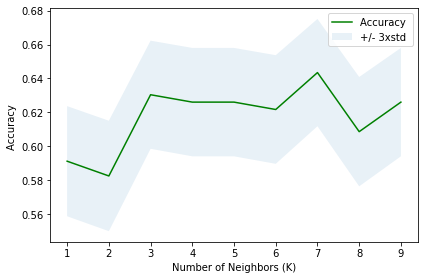

In [ ]:
#plot k= 1:10 accuracy measures and find best k
plt.plot(range(1,Ks),mean_acc_norm,'g')
plt.fill_between(range(1,Ks),mean_acc_norm - 1 * std_acc,mean_acc_norm + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc_norm.max(), "with k=", mean_acc_norm.argmax()+1) 

The best accuracy was with 0.6434782608695652 with k= 7


### Other Measures

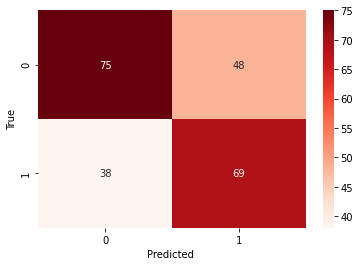

In [ ]:
#create and plot new confusion matrix using test set target
# and predicted target for df_norm
cm_norm = confusion_matrix(ny_test, yhat_norm)

ax= plt.subplot()
sns.heatmap(pd.DataFrame(cm_norm), annot=True,cmap="Reds" , fmt='g')

ax.set_xlabel('Predicted ');ax.set_ylabel('True'); 

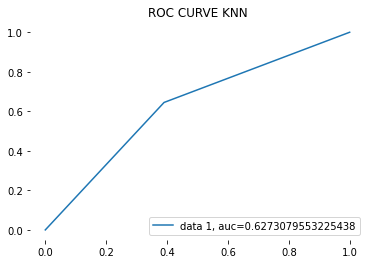

The score for the AUC ROC Curve is: 62.7%


In [ ]:
#Calculate and plot roc curve and auc score
#for df_norm
fpr, tpr, _ = roc_curve(ny_test, yhat_norm)
auc = roc_auc_score(ny_test, yhat_norm)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.box(False)
plt.title ('ROC CURVE KNN')
plt.show()

print(f"The score for the AUC ROC Curve is: {round(auc,3)*100}%")

In [ ]:
from sklearn.metrics import classification_report 
#classification report for df_norm
nmodel_classification = classification_report(ny_test, yhat_norm)
print(nmodel_classification)

              precision    recall  f1-score   support

           0       0.66      0.61      0.64       123
           1       0.59      0.64      0.62       107

    accuracy                           0.63       230
   macro avg       0.63      0.63      0.63       230
weighted avg       0.63      0.63      0.63       230



In [ ]:
#finding additional quantitative measures
#for df_norm analysis
ntotal=sum(sum(cm_norm))
#####from confusion matrix calculate accuracy
naccuracy=(cm_norm[0,0]+cm_norm[1,1])/ntotal
print ('Accuracy : ', naccuracy)

nsensitivity = cm_norm[0,0]/(cm_norm[0,0]+cm_norm[0,1])
print('Sensitivity : ', nsensitivity)

nspecificity = cm_norm[1,1]/(cm_norm[1,0]+cm_norm[1,1])
print('Specificity : ', nspecificity)

#Youden's Index
nyouden = nspecificity+nsensitivity - 1
print('Youden Index : ', nyouden)

Accuracy :  0.6260869565217392
Sensitivity :  0.6097560975609756
Specificity :  0.6448598130841121
Youden Index :  0.2546159106450876


## Analysis of df_norm KNN classification:
*The measures on the second dataset gave mixed results. The accuracy scores did decrease and the scores for training and testing were further apart pointing to some overfitting of the model. The AUC curve for the second model however is higher than the model with the original data with a score of 0.635 as opposed to a score of 0.53 in the original data. More observations with 10 year risk for heart disease were accurately identified, however this did come at a cost of more false negatives. This also resulted in a lower sensitivity score (0.64) but a much higher specificity (0.63) score. The score for precision also decreased to (0.67). Overall this change resulted in an improved Youden’s Index score (although still fairly low since the ideal score is 1) of 0.27. With the exception of a possible overfitting problem it would appear that using the sampled data that was balanced did improve the model and results.*